<a href="https://colab.research.google.com/github/inarentifi/inared/blob/main/%CE%91%CE%B5%CF%81%CE%BF%CF%80%CE%BF%CF%81%CE%B9%CE%BA%CE%AC_%CE%B1%CF%84%CF%85%CF%87%CE%AE%CE%BC%CE%B1%CF%84%CE%B1_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#!python -m spacy download el_core_news_sm

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [2]:
nlp = spacy.load('el_core_news_sm')

In [6]:
df = pd.read_csv("/content/drive/MyDrive/αεροπορικα δυστυχηματα 2022-2023.xlsx - Αεροπορικά ατυχήματα  δυστυχ....csv")
df

,type,source,title,text,categories,sentiment,impact,date,time,link
0,twitter,GMitakides,https://twitter.com/GMitakides/status/16708106...,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,50.1350,2023-06-19,18:32:36,https://twitter.com/GMitakides/status/16708106...
1,twitter,arte_kets,https://twitter.com/arte_kets/status/167080026...,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,0.3171,2023-06-19,17:51:46,https://twitter.com/arte_kets/status/167080026...
2,twitter,nanask5,https://twitter.com/nanask5/status/16707967422...,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,1.3440,2023-06-19,17:51:46,https://twitter.com/nanask5/status/16707967422...
3,web,intronews.gr,Ο Jason Statham είναι για Αρχόντους – 10 λόγοι...,Ο Jason Statham πατάει ξανά Ελλάδα για γυρίσμα...,Αεροπορικά ατυχήματα/ δυστυχήματα,Positive,40.0000,2023-06-19,14:51:54,https://www.intronews.gr/stiles/storytelling/j...
4,web,sportlive.gr,Τέμπη διευθυντής συντήρησης ΟΣΕ: Πήρε προθεσμί...,Τέμπη διευθυντής συντήρησης ΟΣΕ: Για αρχές Ιου...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,63.5020,2023-06-19,14:43:14,https://sportlive.gr/news/koinonia/tempi-dieyt...
...,...,...,...,...,...,...,...,...,...,...
4995,web,neakriti.gr,Σοκ στις ΗΠΑ: Αυτοκίνητο έπεσε πάνω σε αστυνομ...,"Υπήρχαν ανθρώπινα σώματα «σκορπισμένα παντού, ...",Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,97.1443,2022-11-17,10:15:10,https://www.neakriti.gr/article/kosmos-nea/169...
4996,web,volosday.gr,Βίντεο σοκ: Οδηγός αποκοιμήθηκε κι έπεσε πάνω ...,Εικοσι πέντε εκπαιδευόμενοι αστυνομικοί τραυμα...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,80.8275,2022-11-17,10:08:21,https://www.volosday.gr/vinteo-sok-odigos-apok...
4997,web,star.gr,Καλιφόρνια: 25 νεοσύλλεκτοι αστυνομικοί τραυμα...,Την ώρα του τζόγκινγκ\nΟι αρχές στο\nΛος Άντζε...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,99.1082,2022-11-17,10:01:51,https://www.star.gr/eidiseis/kosmos/604940/kal...
4998,web,1069.gr,Καλιφόρνια: Οδηγός παρέσυρε 25 εκπαιδευόμενους...,25 άνθρωποι τραυματίστηκαν – 5 νοσηλεύονται σε...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,66.7740,2022-11-17,09:55:40,https://www.1069.gr/world/kosmos/kalifornia-od...


In [7]:
df.dropna(inplace=True)

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

,type,source,title,text,categories,sentiment,impact,date,time,link
0,twitter,GMitakides,https://twitter.com/GMitakides/status/16708106...,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,50.1350,2023-06-19,18:32:36,https://twitter.com/GMitakides/status/16708106...
1,twitter,arte_kets,https://twitter.com/arte_kets/status/167080026...,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,0.3171,2023-06-19,17:51:46,https://twitter.com/arte_kets/status/167080026...
2,twitter,nanask5,https://twitter.com/nanask5/status/16707967422...,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,1.3440,2023-06-19,17:51:46,https://twitter.com/nanask5/status/16707967422...
3,web,intronews.gr,Ο Jason Statham είναι για Αρχόντους – 10 λόγοι...,Ο Jason Statham πατάει ξανά Ελλάδα για γυρίσμα...,Αεροπορικά ατυχήματα/ δυστυχήματα,Positive,40.0000,2023-06-19,14:51:54,https://www.intronews.gr/stiles/storytelling/j...
4,web,sportlive.gr,Τέμπη διευθυντής συντήρησης ΟΣΕ: Πήρε προθεσμί...,Τέμπη διευθυντής συντήρησης ΟΣΕ: Για αρχές Ιου...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,63.5020,2023-06-19,14:43:14,https://sportlive.gr/news/koinonia/tempi-dieyt...


In [10]:
df.tail()

,type,source,title,text,categories,sentiment,impact,date,time,link
4981,web,neakriti.gr,Σοκ στις ΗΠΑ: Αυτοκίνητο έπεσε πάνω σε αστυνομ...,"Υπήρχαν ανθρώπινα σώματα «σκορπισμένα παντού, ...",Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,97.1443,2022-11-17,10:15:10,https://www.neakriti.gr/article/kosmos-nea/169...
4982,web,volosday.gr,Βίντεο σοκ: Οδηγός αποκοιμήθηκε κι έπεσε πάνω ...,Εικοσι πέντε εκπαιδευόμενοι αστυνομικοί τραυμα...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,80.8275,2022-11-17,10:08:21,https://www.volosday.gr/vinteo-sok-odigos-apok...
4983,web,star.gr,Καλιφόρνια: 25 νεοσύλλεκτοι αστυνομικοί τραυμα...,Την ώρα του τζόγκινγκ\nΟι αρχές στο\nΛος Άντζε...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,99.1082,2022-11-17,10:01:51,https://www.star.gr/eidiseis/kosmos/604940/kal...
4984,web,1069.gr,Καλιφόρνια: Οδηγός παρέσυρε 25 εκπαιδευόμενους...,25 άνθρωποι τραυματίστηκαν – 5 νοσηλεύονται σε...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,66.7740,2022-11-17,09:55:40,https://www.1069.gr/world/kosmos/kalifornia-od...
4985,web,thetoc.gr,Λος Αντζελες: Αυτοκίνητο παρέσυρε αστυνομικούς...,Η ομάδα των εκπαιδευόμενων αστυνομικών έκανε π...,Αεροπορικά ατυχήματα/ δυστυχήματα,Neutral,99.0581,2022-11-17,09:54:40,https://www.thetoc.gr/diethni/article/los-antz...


In [11]:
df["full_text"] = df["title"] + df["text"]

In [12]:
df['datetime'] = pd.to_datetime(df['date'],  format= "%Y-%m-%d")

In [13]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [14]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [16]:
short_df = df[['datetime','text' ]]

In [17]:
short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year
short_df['month'] = pd.DatetimeIndex(short_df['datetime']).month
short_df['day'] = pd.DatetimeIndex(short_df['datetime']).day

<ipython-input-17-61fee6f0792e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year
<ipython-input-17-61fee6f0792e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['month'] = pd.DatetimeIndex(short_df['datetime']).month
<ipython-input-17-61fee6f0792e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<Axes: ylabel='day'>

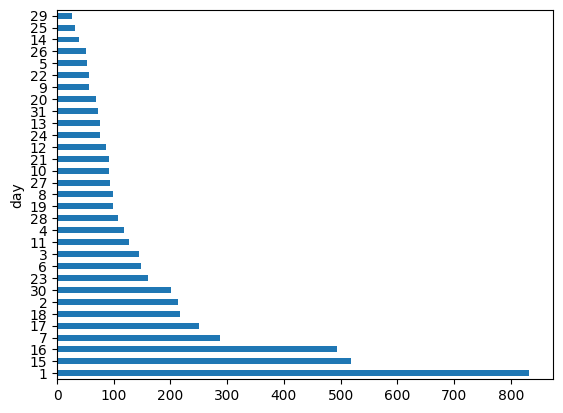

In [18]:
short_df['day'].value_counts().plot(kind='barh') # ποσα αρθα δημοσιευονται τη μερα

In [19]:
short_df.reset_index(inplace=True)
short_df.set_index('datetime', inplace=True)
short_df #χρησιμοποιω το datetime σαν index

,index,text,year,month,day
datetime,,,,,
2023-06-19,0,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,2023,6,19
2023-06-19,1,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,2023,6,19
2023-06-19,2,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,2023,6,19
2023-06-19,3,Ο Jason Statham πατάει ξανά Ελλάδα για γυρίσμα...,2023,6,19
2023-06-19,4,Τέμπη διευθυντής συντήρησης ΟΣΕ: Για αρχές Ιου...,2023,6,19
...,...,...,...,...,...
2022-11-17,4981,"Υπήρχαν ανθρώπινα σώματα «σκορπισμένα παντού, ...",2022,11,17
2022-11-17,4982,Εικοσι πέντε εκπαιδευόμενοι αστυνομικοί τραυμα...,2022,11,17
2022-11-17,4983,Την ώρα του τζόγκινγκ\nΟι αρχές στο\nΛος Άντζε...,2022,11,17


In [20]:
text = short_df['text'].str.cat(sep = ' ')

In [21]:
text

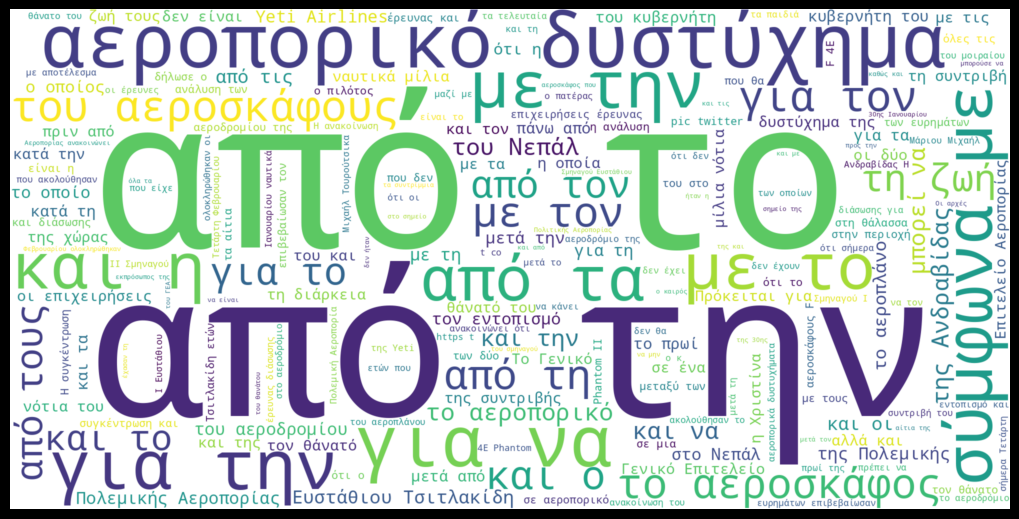

In [59]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text) # το όνομα του κειμένου
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

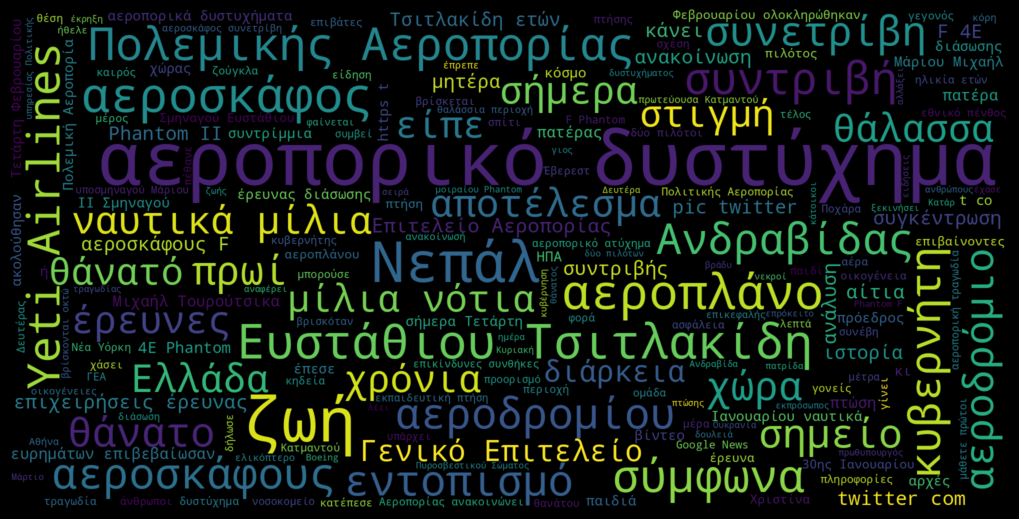

In [60]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [61]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"


In [62]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
emolex_df.tail()


,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [65]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
short_df = df[['date','text' ]]

In [67]:
short_df['date'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d')


<ipython-input-67-a5abab2c2597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['date'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d')


In [68]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [69]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [70]:
matrix = vec.fit_transform(short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
wordcount_df.shape

(4986, 13161)

In [73]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [74]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [79]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
wordcount_df[trust_words].sum(axis=1)

0        0
1        0
2        0
3       12
4        5
        ..
4981     9
4982     8
4983     8
4984    10
4985    11
Length: 4986, dtype: int64

In [76]:
short_df.head(3)

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-06-19,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
1,2023-06-19,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
2,2023-06-19,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1


In [75]:
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-75-ba535ce3a623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-75-ba535ce3a623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-75-ba535ce3a623>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [80]:
short_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-06-19,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
1,2023-06-19,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
2,2023-06-19,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
3,2023-06-19,Ο Jason Statham πατάει ξανά Ελλάδα για γυρίσμα...,18,33,16,14,8,12,17,11,34,15
4,2023-06-19,Τέμπη διευθυντής συντήρησης ΟΣΕ: Για αρχές Ιου...,2,9,1,2,2,5,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4981,2022-11-17,"Υπήρχαν ανθρώπινα σώματα «σκορπισμένα παντού, ...",3,8,0,1,1,9,0,3,7,5
4982,2022-11-17,Εικοσι πέντε εκπαιδευόμενοι αστυνομικοί τραυμα...,3,7,0,1,1,8,0,3,6,5
4983,2022-11-17,Την ώρα του τζόγκινγκ\nΟι αρχές στο\nΛος Άντζε...,4,8,0,1,1,8,0,3,7,6
4984,2022-11-17,25 άνθρωποι τραυματίστηκαν – 5 νοσηλεύονται σε...,3,7,0,1,1,10,0,3,8,5


In [81]:
short_df.reset_index(inplace=True)
short_df.set_index('date', inplace=True)
short_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-06-19,0,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
2023-06-19,1,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
2023-06-19,2,RT @KYTKYTKYTKYTKYT: Το παράθυρο Overton πήρε ...,0,1,0,0,1,0,0,1,1,1
2023-06-19,3,Ο Jason Statham πατάει ξανά Ελλάδα για γυρίσμα...,18,33,16,14,8,12,17,11,34,15
2023-06-19,4,Τέμπη διευθυντής συντήρησης ΟΣΕ: Για αρχές Ιου...,2,9,1,2,2,5,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17,4981,"Υπήρχαν ανθρώπινα σώματα «σκορπισμένα παντού, ...",3,8,0,1,1,9,0,3,7,5
2022-11-17,4982,Εικοσι πέντε εκπαιδευόμενοι αστυνομικοί τραυμα...,3,7,0,1,1,8,0,3,6,5
2022-11-17,4983,Την ώρα του τζόγκινγκ\nΟι αρχές στο\nΛος Άντζε...,4,8,0,1,1,8,0,3,7,6


<Axes: xlabel='date'>

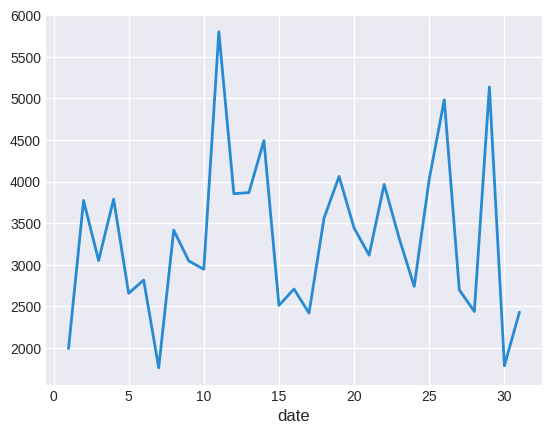

In [82]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot()


<Axes: xlabel='date'>

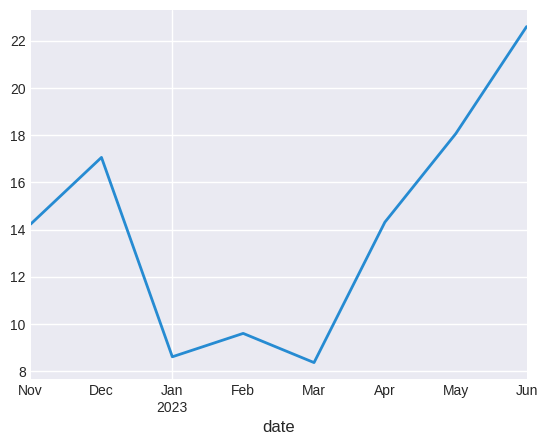

In [83]:
short_df['positive'].resample('M').mean().plot()

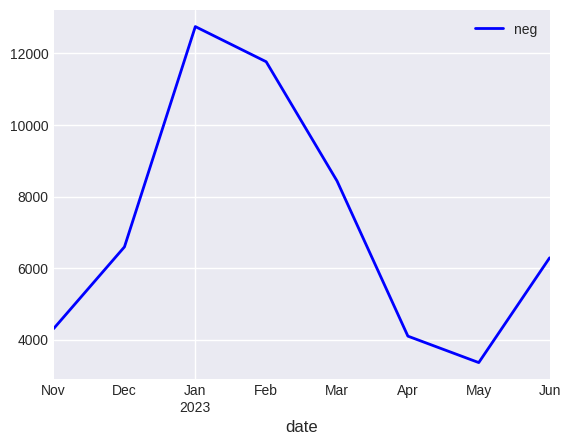

In [84]:
short_df['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

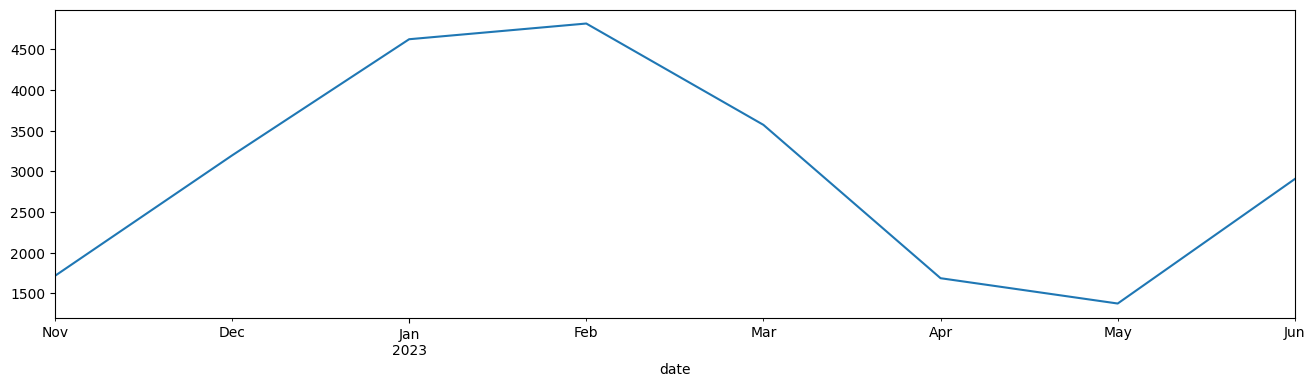

In [96]:
short_df['anger'].resample('M').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

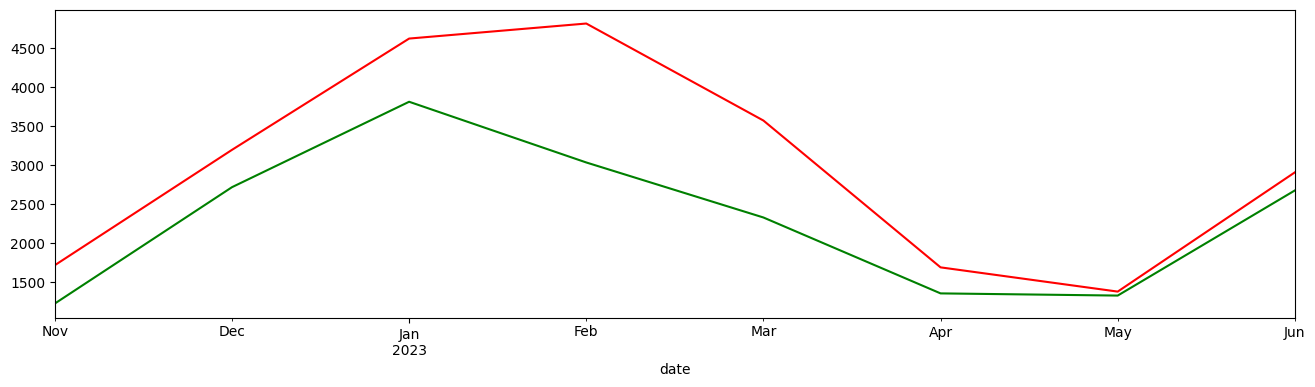

In [95]:
ax = short_df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_df['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')


<Axes: xlabel='date'>

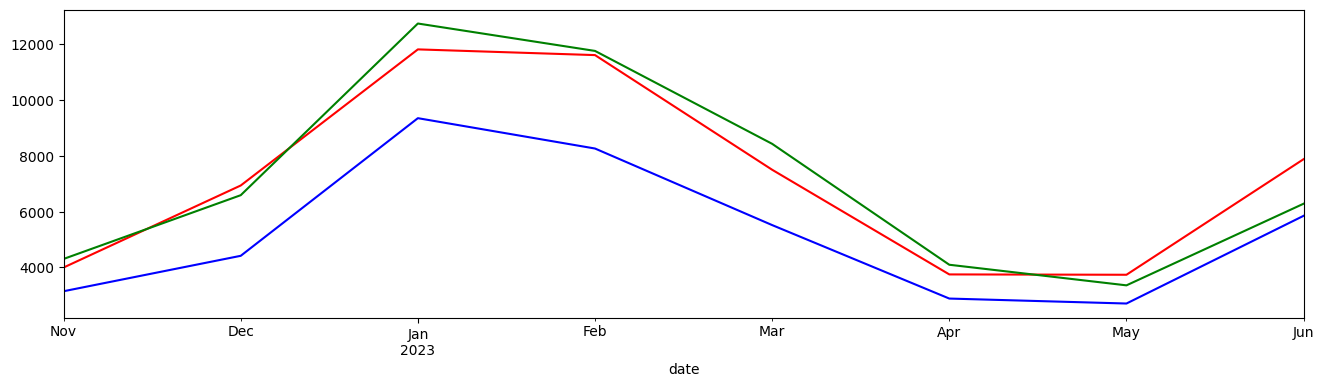

In [94]:
ax = short_df['positive'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_df['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_df['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [93]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [92]:
plt.style.use('Solarize_Light2')

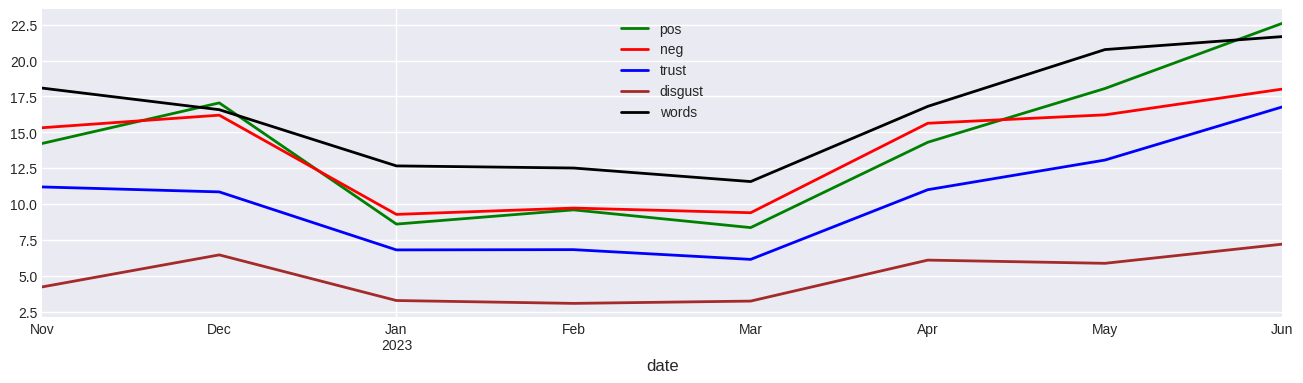

In [91]:
ax = short_df['positive'].resample('M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_df['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_df['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_df['text'].str.len().resample('M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()


<Axes: xlabel='date'>

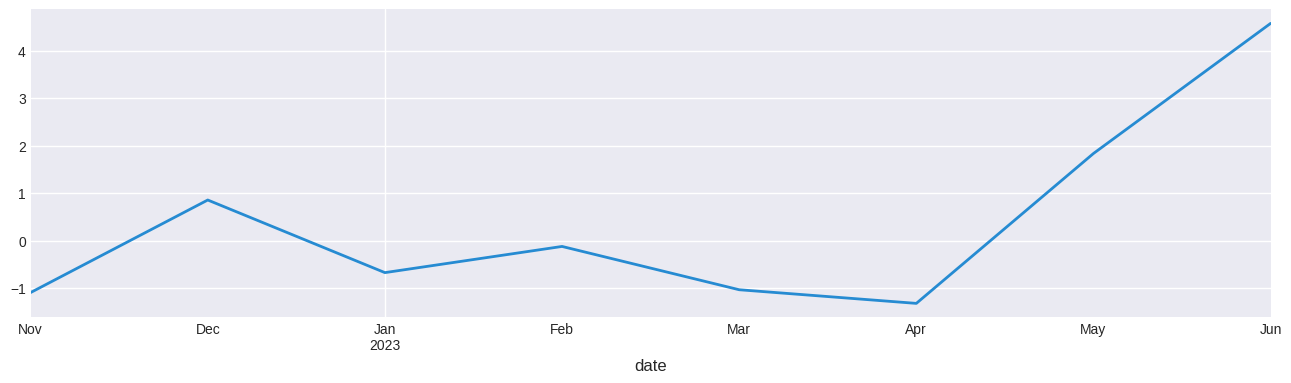

In [90]:
short_df['pos/neg'] = short_df['positive'] - short_df['negative']
short_df['pos/neg'].resample('M').mean().plot(figsize=(16,4))

In [89]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

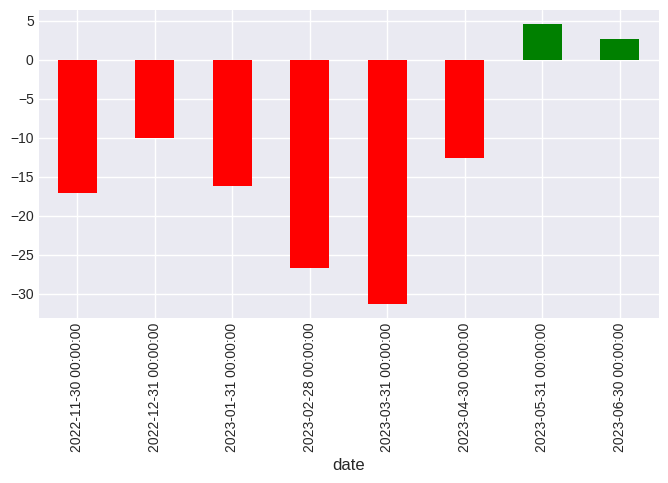

In [88]:
short_df['(-)αρνητικότητα | θετικότητα(+)'] = short_df.positive*100//short_df[['positive','negative']].sum(
        axis=1) - short_df.negative*100//short_df[['positive','negative']].sum(axis=1)

short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean().plot(kind='bar',
                                                                               color=(short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [87]:
short_df[(short_df['(-)αρνητικότητα | θετικότητα(+)'] == short_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_df['(-)αρνητικότητα | θετικότητα(+)'] == short_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]


,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-06-17,28,0,2,-100.0
2023-06-15,63,0,7,-100.0
2023-06-15,112,0,4,-100.0
2023-06-15,116,0,4,-100.0
2023-06-10,280,0,6,-100.0
...,...,...,...,...
2022-11-23,4816,0,1,-100.0
2022-11-23,4817,0,3,-100.0
2022-11-23,4819,0,2,-100.0
